In [1]:
%matplotlib inline
import talib as ta
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [26]:
class TALibVolumeStudies:
    
    def ChaikinAD(self, high, low, close, volume, feature_dict):
        feature_dict['ChaikinAD']='Keep'
        chaikinAD = ta.AD(
            high,
            low,
            close, 
            volume)
        return chaikinAD, feature_dict
    
    def ChaikinADOSC(self, high, low, close, volume, fastperiod, slowperiod, feature_dict):
        feature_dict['ChaikinADOSC_f'+str(fastperiod)+'_s'+str(slowperiod)]='Keep'
        chaikinADOSC = ta.ADOSC(
            high,
            low,
            close, 
            volume,
            fastperiod,
            slowperiod)
        return chaikinADOSC, feature_dict
    
    def OBV(self, close, volume, feature_dict):
        feature_dict['OBV']='Keep'
        onBalVol = ta.OBV(
            close, 
            volume)
        return onBalVol, feature_dict

In [27]:
import sys
sys.path.append('./lib')
sys.path.append('./utilities')
from plot_utils import *
from retrieve_data import *
dataLoadStartDate = "2014-04-01"
dataLoadEndDate = "2018-04-01"
issue = "TLT"
feature_dict = {}

taLibVolSt = TALibVolumeStudies()
    
dSet = DataRetrieve()
dataSet = dSet.read_issue_data(issue)
    
dataSet = dSet.set_date_range(dataSet, dataLoadStartDate,dataLoadEndDate)

Successfully retrieved data series for TLT


In [28]:
dataSet['ChaikinAD'], feature_dict = taLibVolSt.ChaikinAD(dataSet.High.values, dataSet.Low.values, dataSet.Pri.values, dataSet.Volume, feature_dict)
dataSet['ChaikinADOSC'], feature_dict = taLibVolSt.ChaikinADOSC(dataSet.High.values, dataSet.Low.values, dataSet.Pri.values, dataSet.Volume, 3, 10, feature_dict)
dataSet['OBV'], feature_dict = taLibVolSt.OBV(dataSet.Pri.values, dataSet.Volume, feature_dict)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


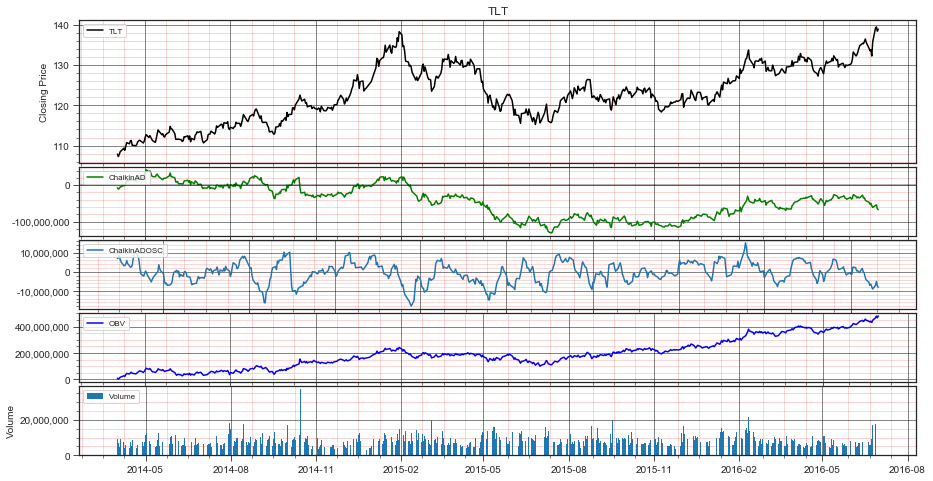

In [29]:
startDate = "2014-02-01"
endDate = "2016-06-30"
rsiDataSet = dataSet.ix[startDate:endDate]
plt.figure(figsize=(15,8))
horizplots = 6
top = plt.subplot2grid((horizplots,4), (0, 0), rowspan=2, colspan=4)
middle = plt.subplot2grid((horizplots,4), (2, 0), rowspan=1, colspan=4)
middle2 = plt.subplot2grid((horizplots,4), (3, 0), rowspan=1, colspan=4)
middle3 = plt.subplot2grid((horizplots,4), (4, 0), rowspan=1, colspan=4)
bottom = plt.subplot2grid((horizplots,4), (5, 0), rowspan=1, colspan=4)

top.plot(rsiDataSet.index, rsiDataSet['Pri'], 'k-', markersize=3,label=issue)
middle.plot(rsiDataSet.index, rsiDataSet['ChaikinAD'], 'g-')
middle2.plot(rsiDataSet.index, rsiDataSet['ChaikinADOSC'], '-')
middle3.plot(rsiDataSet.index, rsiDataSet['OBV'], 'b-')
bottom.bar(rsiDataSet.index, rsiDataSet['Volume'], label='Volume')

plt.subplots_adjust(hspace=0.05)
# set the labels
top.axes.get_xaxis().set_visible(True)
top.set_title('TLT')
top.set_ylabel('Closing Price')
bottom.set_ylabel('Volume')

#top.axhline(y=30, color='red', linestyle='-', alpha=0.4)
#top.axhline(y=70, color='blue', linestyle='-', alpha=0.4)
middle.axhline(y=0, color='black', linestyle='-', alpha=0.4)

for ax in top, middle, middle2, middle3, bottom:
                ax.label_outer()
                ax.legend(loc='upper left', frameon=True, fontsize=8)
                ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
                ax.grid(True, which='both')
                ax.xaxis_date()
                ax.autoscale_view()
                ax.grid(b=True, which='major', color='k', linestyle='-', alpha=0.6)
                ax.grid(b=True, which='minor', color='r', linestyle='-', alpha=0.2)
                ax.minorticks_on()

In [20]:
print(feature_dict)

{'ChaikinAD': 'Keep'}
